In [ ]:
#Regression Models For Count Data - Poisson and Negative Binomial GLM

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


In [ ]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
df.head()

In [167]:
dummy_variables = pd.get_dummies(df['prog'])
dummy_variables = dummy_variables.rename(columns={1: 'general', 2: 'vocational', 3: 'academic'})
df = pd.concat([df, dummy_variables], axis=1)
df.head()

,id,num_awards,prog,math,general,vocational,academic
0,45,0,3,41,0,0,1
1,108,0,1,41,1,0,0
2,15,0,3,44,0,0,1
3,67,0,3,42,0,0,1
4,153,0,3,40,0,0,1


In [191]:
X = df[['math','general','vocational','academic']]
X = sm.add_constant(X)
y = df['num_awards']

In [193]:
#Fit a Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Mon, 25 Mar 2024   Deviance:                       189.45
Time:                        12:17:29   Pearson chi2:                     212.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5719      0.459     -7.774      0.000      -4.472      -2.671
math           0.0702      0.011      6.619      0.000       0.049       0.091
general       -1.6752      0.289     -5.804      0.000      -2.241      -1.109
vocational    -0.5913      0.248     -2.380      0.017      -1.078      -0.104
academic      -1.3054      0.259     -5.040      0.000      -1.813      -0.798
==============================================================================
"""

0      0.135191
1      0.093399
2      0.166858
3      0.145016
4      0.126032
         ...   
195    2.264955
196    1.468314
197    2.264955
198    2.429553
199    2.606113
Length: 200, dtype: float64


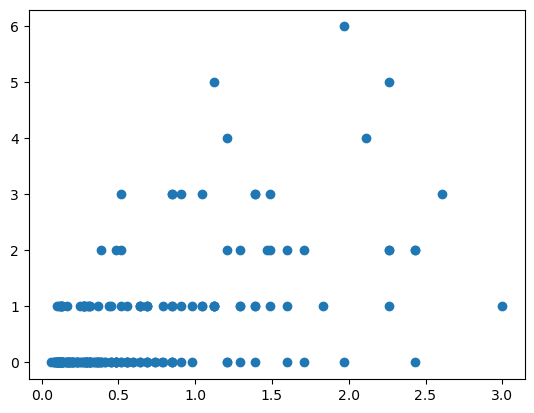

In [195]:
predicted_values = result.predict(X)
print(predicted_values)
plt.scatter(predicted_values,y)

In [197]:
model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
result = model.fit()
result.summary()

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.98
Date:                Mon, 25 Mar 2024   Deviance:                       123.41
Time:                        12:17:29   Pearson chi2:                     139.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2555
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6549      0.620     -5.891      0.000      -4.871      -2.439
math           0.0723      0.015      4.859      0.000       0.043       0.101
general       -1.6886      0.344     -4.904      0.000      -2.363      -1.014
vocational    -0.6400      0.324     -1.977      0.048      -1.275      -0.005
academic      -1.3263      0.307     -4.326      0.000      -1.927      -0.725
==============================================================================
"""

0      0.132866
1      0.092480
2      0.165031
3      0.142823
4      0.123604
         ...   
195    2.306451
196    1.550405
197    2.306451
198    2.479290
199    2.665082
Length: 200, dtype: float64


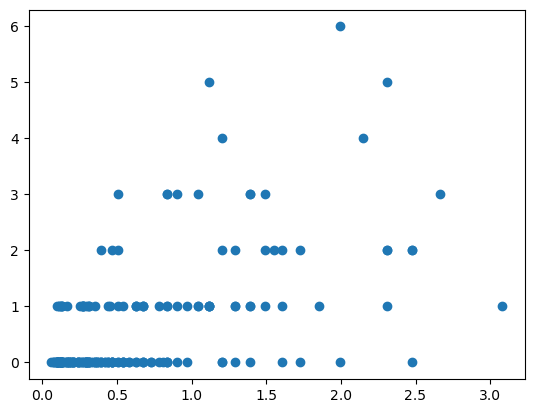

In [199]:
predicted_values = result.predict(X)
print(predicted_values)
plt.scatter(predicted_values,y)